# PROJECT

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Zeros are medically impossibe fpr some columns

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for col in zero_cols:
    print(f'{col}: {(df[col]==0).sum()}zeros')

Glucose: 5zeros
BloodPressure: 35zeros
SkinThickness: 227zeros
Insulin: 374zeros
BMI: 11zeros


In [9]:
#Replacing zeros with NaN
df[zero_cols] = df[zero_cols].replace(0, np.nan)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
#Since it is a medical data, meedian works best because of skewed distributions

for col in zero_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis

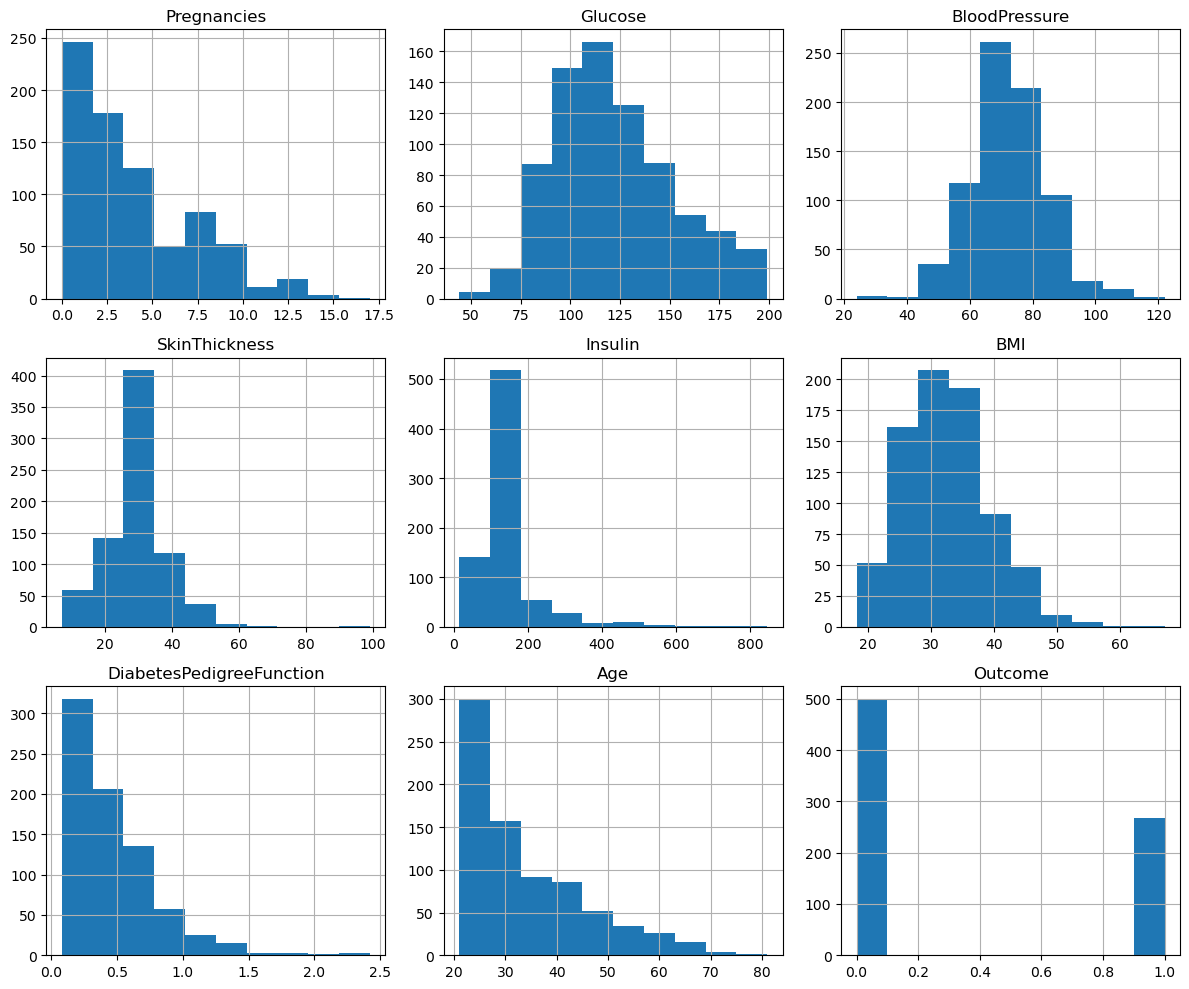

In [11]:
# Histogram

df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

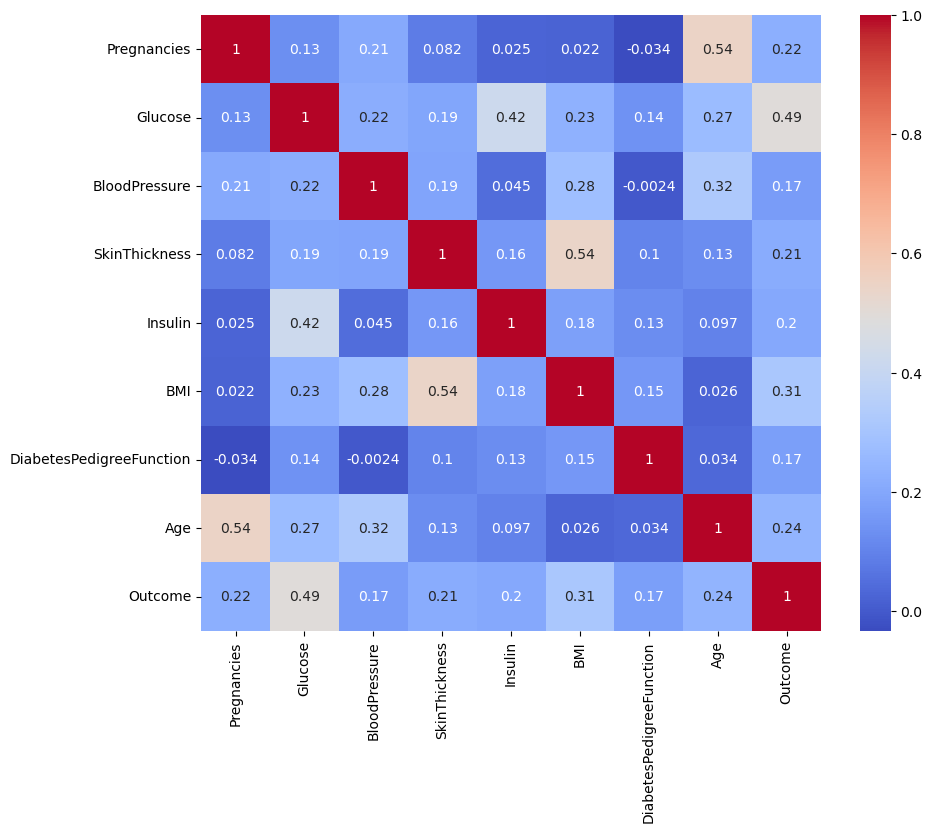

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
df['Outcome'].value_counts()
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='BMI'>

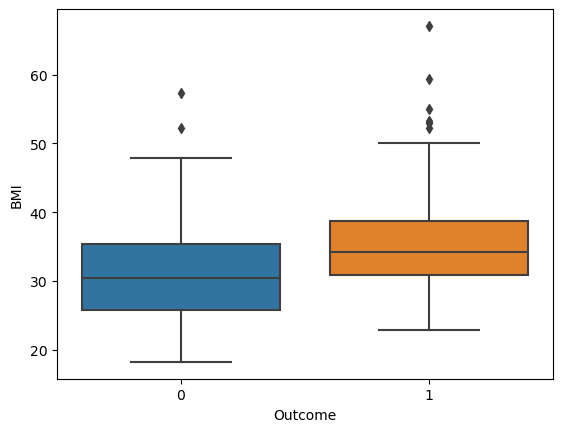

In [14]:
# BMI vs Outcome
sns.boxplot(x='Outcome', y='BMI', data=df)

<Axes: xlabel='Outcome', ylabel='Glucose'>

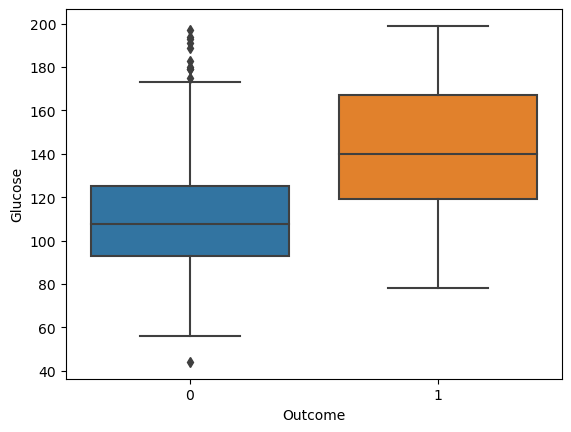

In [15]:
#Glucose vs Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(460, 154, 154)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.Outcome.values
y_val = df_val.Outcome.values
y_test = df_test.Outcome.values

del df_train['Outcome']
del df_val['Outcome']
del df_test['Outcome']

In [21]:
X_train = df_train
X_val = df_val
X_test = df_test

In [22]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score, roc_auc_score
)
from sklearn.model_selection import cross_val_score, KFold    

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
#Training Logistic Regression baseline_model
baseline_model = LogisticRegression(max_iter=1000, solver='liblinear')
baseline_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
#Predict on validation set
y_val_pred_base = baseline_model.predict(X_val_scaled)
y_val_prob_base = baseline_model.predict_proba(X_val_scaled)[:, 1]

In [27]:
#Evaluation
print(' Baseline Validation Performance ')
print('Accuracy: ', accuracy_score(y_val, y_val_pred_base))
print('Precision: ', precision_score(y_val, y_val_pred_base))
print('Recall: ', recall_score(y_val, y_val_pred_base))
print('F1 Score: ', f1_score(y_val, y_val_pred_base))
print('\nClassification Report: ')
print(classification_report(y_val, y_val_pred_base))

 Baseline Validation Performance 
Accuracy:  0.7532467532467533
Precision:  0.6470588235294118
Recall:  0.6226415094339622
F1 Score:  0.6346153846153846

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       101
           1       0.65      0.62      0.63        53

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



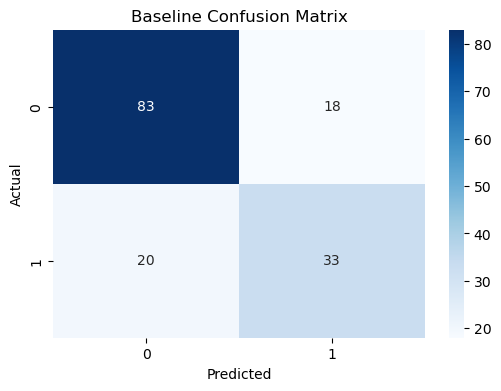

In [28]:
# Confusion Matrix
cm_base = confusion_matrix(y_val, y_val_pred_base)
plt.figure(figsize=(6,4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.show()

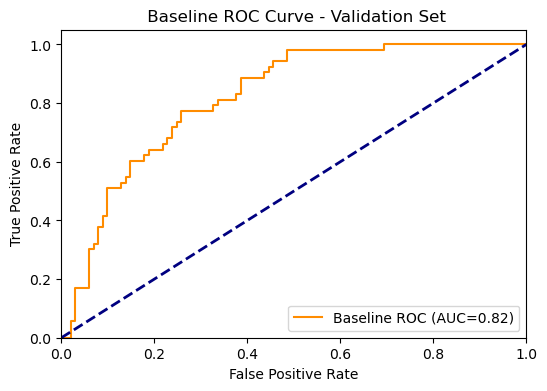

In [29]:
#ROC Curve
fpr_base, tpr_base, _ = roc_curve(y_val, y_val_prob_base)
roc_auc_base = auc(fpr_base, tpr_base)

plt.figure(figsize=(6,4))
plt.plot(fpr_base, tpr_base,label=f'Baseline ROC (AUC={roc_auc_base:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Baseline ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

In [30]:
#K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_scores_base = cross_val_score(baseline_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print('Baseline K-Fold Cross-Validation Accuracy Scores:', cv_scores_base)
print('Baseline Mean CV Accuracy:', np.mean(cv_scores_base))

Baseline K-Fold Cross-Validation Accuracy Scores: [0.75       0.66304348 0.76086957 0.80434783 0.84782609]
Baseline Mean CV Accuracy: 0.7652173913043478


In [31]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter Tuning
param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver' : ['liblinear'],
    'max_iter' : [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=kf, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print('Best Hyperparameters:', grid.best_params_)
print('Best CV Score (AUC):', grid.best_score_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (AUC): 0.8314694021844445


In [32]:
#Tuned Model Training
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_val_pred = best_model.predict(X_val_scaled)
y_val_prob = best_model.predict_proba(X_val_scaled)[:,1]

In [33]:
#Evaluate Tuned Model
print(' Tuned Model Validation Performance ')
print('Accuracy: ', accuracy_score(y_val, y_val_pred))
print('Precision: ', precision_score(y_val, y_val_pred))
print('Recall: ', recall_score(y_val, y_val_pred))
print('F1 Score: ', f1_score(y_val, y_val_pred))
print('\nClassification Report: ')
print(classification_report(y_val, y_val_pred))


 Tuned Model Validation Performance 
Accuracy:  0.7467532467532467
Precision:  0.6346153846153846
Recall:  0.6226415094339622
F1 Score:  0.6285714285714286

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       101
           1       0.63      0.62      0.63        53

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



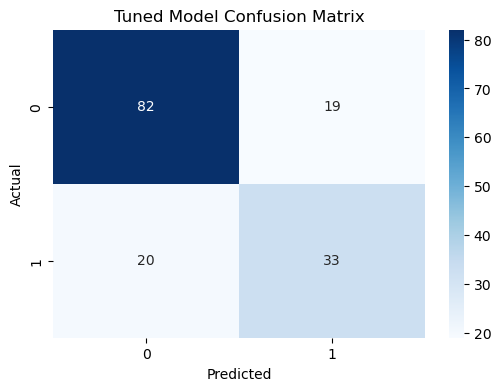

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Model Confusion Matrix')
plt.show()

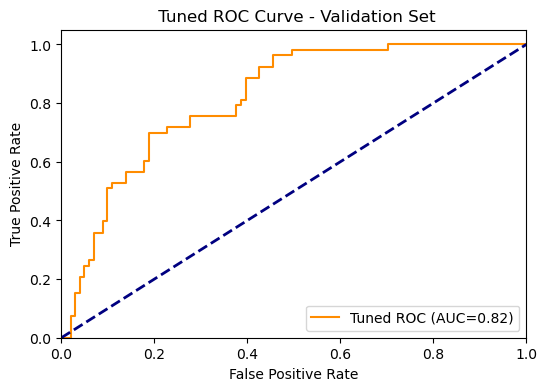

In [35]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Tuned ROC (AUC={roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Tuned ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

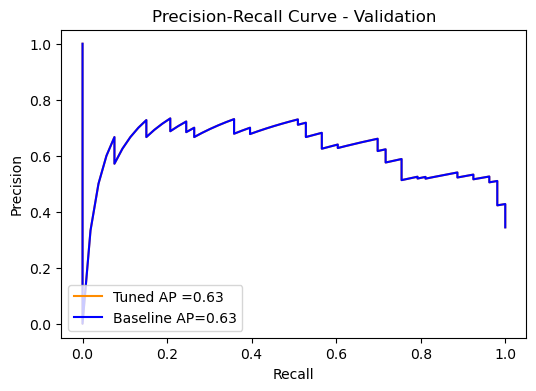

In [36]:
#Precision-Recall Curve (baseline vs tuned)
precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
avg_precision = average_precision_score(y_val, y_val_prob)

precision_base, recall_base, _ = precision_recall_curve(y_val, y_val_prob)
avg_precision_base = average_precision_score(y_val, y_val_prob_base)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'Tuned AP ={avg_precision:.2f}', color='darkorange')
plt.plot(recall_base, precision_base, label=f'Baseline AP={avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation')
plt.legend(loc='lower left')
plt.show()

In [37]:
#Coefficients as Feature Importance
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient':best_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print('\nFeature Coefficients (Top Positive & Negative Impact):')
print(coef_df)


Feature Coefficients (Top Positive & Negative Impact):
                    Feature  Coefficient
1                   Glucose     0.966563
5                       BMI     0.363288
0               Pregnancies     0.277525
6  DiabetesPedigreeFunction     0.266913
7                       Age     0.031147
2             BloodPressure     0.000000
3             SkinThickness     0.000000
4                   Insulin     0.000000


In [38]:
# Final Test Evaluation
y_test_pred_base = baseline_model.predict(X_test_scaled)
y_test_pred = best_model.predict(X_test_scaled)
y_test_prob = best_model.predict_proba(X_test_scaled)[:,1]

print('    Test Set Performance Comparison     ')
print(f"{'Metric':<10}{'Baseline':>10}{'Tuned':>10}")
print(f"{'Accuracy':<10}{accuracy_score(y_test, y_test_pred_base):>10.3f}{accuracy_score(y_test, y_test_pred):>10.3f}")
print(f"{'Precision':<10}{precision_score(y_test, y_test_pred_base):>10.3f}{precision_score(y_test, y_test_pred):>10.3f}")
print(f"{'Recall':<10}{recall_score(y_test, y_test_pred_base):>10.3f}{recall_score(y_test, y_test_pred):>10.3f}")
print(f"{'F1 Score':<10}{f1_score(y_test, y_test_pred_base):>10.3f}{f1_score(y_test, y_test_pred):>10.3f}")
print(f"{'ROC AUC': <10}{roc_auc_score(y_test, baseline_model.predict_proba(X_test_scaled)[:,1]):>10.3f}{roc_auc_score(y_test,y_test_prob):>10.3f}")      

    Test Set Performance Comparison     
Metric      Baseline     Tuned
Accuracy       0.773     0.786
Precision      0.700     0.739
Recall         0.636     0.618
F1 Score       0.667     0.673
ROC AUC        0.870     0.865


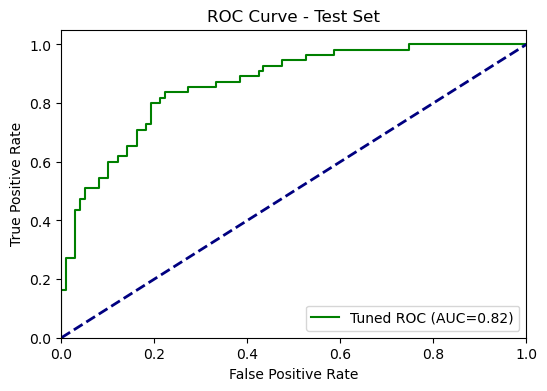

In [39]:
#ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f'Tuned ROC (AUC={roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

#Baseline Decision Tree
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
y_pred_base = dt_base.predict(X_test)

print('\n    Baseline Decision Tree   ')
print('Accuracy:', accuracy_score(y_test, y_pred_base))
print('Precision:', precision_score(y_test, y_pred_base))
print('Recall:', recall_score(y_test, y_pred_base))
print('F1 Score:', f1_score(y_test, y_pred_base))


    Baseline Decision Tree   
Accuracy: 0.6558441558441559
Precision: 0.5166666666666667
Recall: 0.5636363636363636
F1 Score: 0.5391304347826087


In [42]:
#Tuned Decision Tree
param_grid = {
    'max_depth': [3, 5 , 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [43]:
grid = GridSearchCV( 
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [44]:
grid.fit(X_train, y_train)

dt_tuned = grid.best_estimator_

In [45]:
y_pred_tuned = dt_tuned.predict(X_test)

print('\n    Tuned Decision Tree   ')
print('Accuracy:', accuracy_score(y_test, y_pred_tuned))
print('Precision:', precision_score(y_test, y_pred_tuned))
print('Recall:', recall_score(y_test, y_pred_tuned))
print('F1 Score:', f1_score(y_test, y_pred_tuned))



    Tuned Decision Tree   
Accuracy: 0.7792207792207793
Precision: 0.8
Recall: 0.509090909090909
F1 Score: 0.6222222222222222


# Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred_rf = rf.predict(X_test)

print('\n    Random Forest   ')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))


    Random Forest   
Accuracy: 0.8051948051948052
Precision: 0.7450980392156863
Recall: 0.6909090909090909
F1 Score: 0.7169811320754716


In [48]:
# K-Fold Cross-Validation

X = df.drop('Outcome', axis=1)
y=df['Outcome']

kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_scores = cross_val_score(dt_tuned, X, y, cv=kf, scoring='accuracy')

print('\n   K-Fold Cross-Validation (Tuned Decision Tree)   ')
print('Fold Accuracies:', cv_scores)
print('Mean Accuracy:', cv_scores.mean())


   K-Fold Cross-Validation (Tuned Decision Tree)   
Fold Accuracies: [0.73376623 0.77272727 0.68181818 0.78431373 0.75816993]
Mean Accuracy: 0.7461590696884814


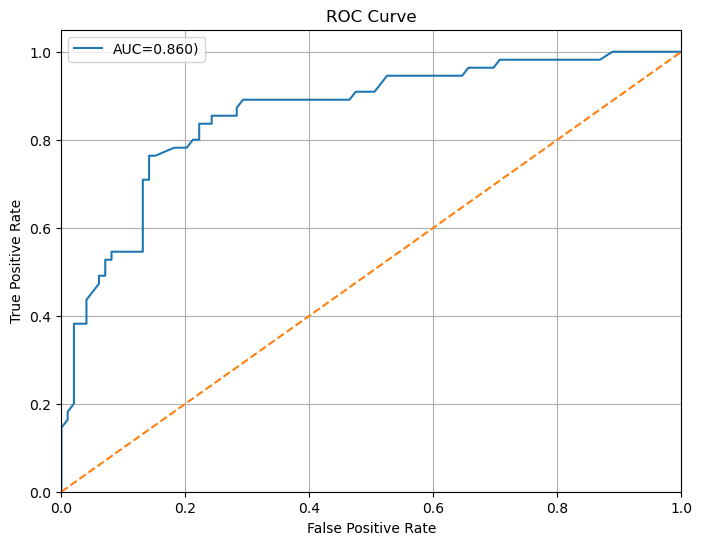

In [49]:
# ROC Curve (Random Forest)

y_proba = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Model Comparison

In [50]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_pred_tuned),
        accuracy_score(y_test, y_pred_rf)
         ],
    
    'Precision': [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_rf)
    ],
    
    'Recall':[
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_pred_tuned),
        recall_score(y_test, y_pred_rf)
    ],
    
    'F1 Score':[
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_pred_tuned),
        f1_score(y_test, y_pred_rf)
    ],
})

print('\n   Model Comparison Table   ')
print(results)


   Model Comparison Table   
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.785714   0.739130  0.618182  0.673267
1        Decision Tree  0.779221   0.800000  0.509091  0.622222
2        Random Forest  0.805195   0.745098  0.690909  0.716981


The best model is the Random Forest model

# Feature Importance Plots

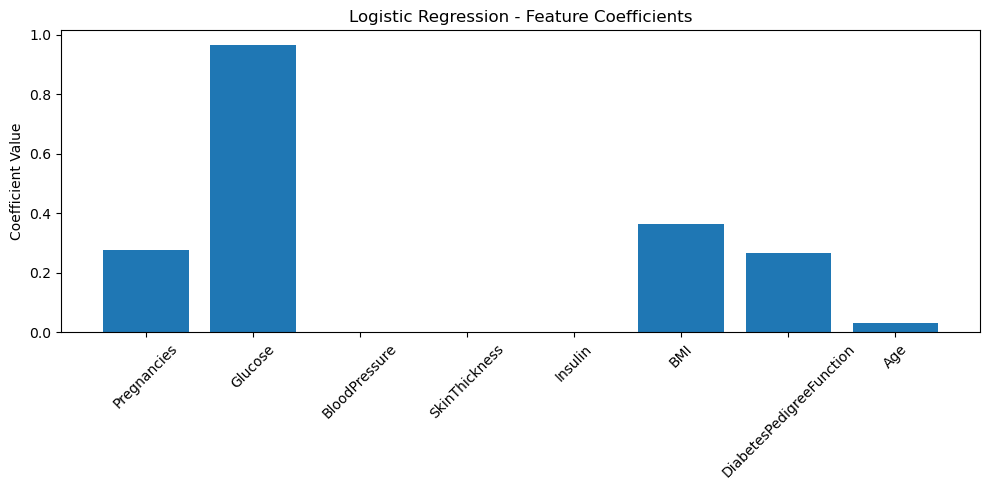

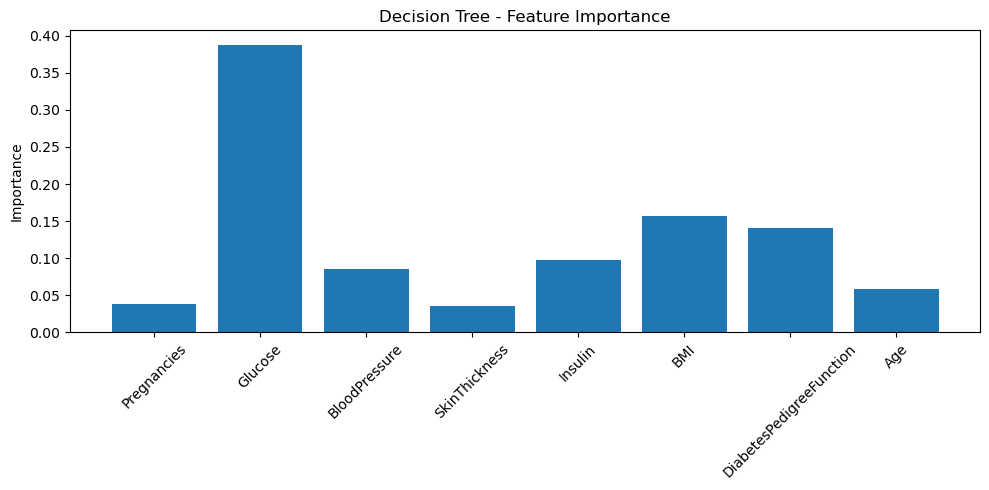

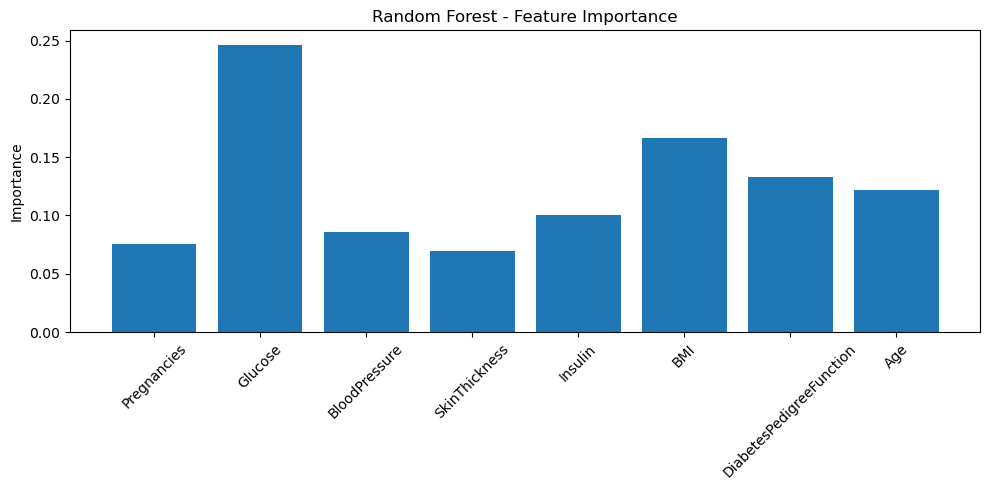

In [51]:
# Logistic Regression (Coefficients)
plt.figure(figsize=(10,5))
coef = best_model.coef_[0]
plt.bar(X.columns, coef)
plt.xticks(rotation=45)
plt.title('Logistic Regression - Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


# Decision Tree Feature Importance
plt.figure(figsize=(10,5))
plt.bar(X.columns, dt_tuned.feature_importances_)
plt.xticks(rotation=45)
plt.title('Decision Tree - Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


# Random Forest Feature Importance
plt.figure(figsize=(10,5))
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=45)
plt.title('Random Forest - Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [52]:
import pickle

# Save the model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
